# About 
Results are loaded from the BSA code. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import pickle 

%matplotlib inline 

In [2]:
path_to_input = '../results/phi/sys.csv'
data = pd.read_csv(path_to_input)

### Sources 
The file contains numerical sources which need to be correlated to string names that are contained in the file `systematic_sources.pkl` which is produced by the code `bsa.py`.

In [3]:
# Numerical names 
systematics = [col for col in data.columns if 'sys' in col and col != 'sys_total']
print('Systematics: ', systematics)

# String names 
with open('../systematic_sources.pkl', 'r') as inputfile:
    systematic_sources = pickle.load(inputfile)
    
for sys in systematics:
    print(sys, systematic_sources[sys])

('Systematics: ', ['sys_0', 'sys_1', 'sys_10', 'sys_11', 'sys_2', 'sys_3', 'sys_4', 'sys_5', 'sys_6', 'sys_7', 'sys_8', 'sys_9'])
('sys_0', 'beam_pol')
('sys_1', u'dist_dcr3')
('sys_10', u'dist_cc')
('sys_11', u'dist_ecv')
('sys_2', u'dist_dcr1')
('sys_3', u'dist_vz')
('sys_4', u'dist_ecsf')
('sys_5', u'dist_ecw')
('sys_6', u'dist_ec_edep')
('sys_7', u'p_mes')
('sys_8', u'alpha')
('sys_9', u'dist_ecu')


### Human Readable Names 
Here I will setup human readable names for the abbreviations used in the dictionary.  These are used during plotting. 

In [9]:
systematic_names = {}
systematic_names['beam_pol'] = 'Beam polarization'
systematic_names['dist_dcr1'] = 'Fid. DC R1'
systematic_names['dist_dcr3'] = 'Fid. DC R3'
systematic_names['dist_cc'] = 'Fid. CC'
systematic_names['dist_ecu'] = 'EC-U'
systematic_names['dist_ecv'] = 'EC-V'
systematic_names['dist_ecw'] = 'EC-W'
systematic_names['dist_vz'] = 'z-vertex'
systematic_names['dist_ecsf'] = 'Sampling fraction'
systematic_names['p_mes'] = 'Kaon momentum'
systematic_names['alpha'] = 'Confidence (Kaon ID)'
systematic_names['dist_ec_edep'] = 'EC energy deposition'
systematic_names['missing_mass'] = 'Missing mass'

### Plotting Options 
Setup some basic plotting options.  Using the latex titles makes it slow.

In [5]:
plt.rc('font', family='serif')
plt.rc('font', size=16)
plt.rc('text', usetex=True)

### Plot Averaged Systematics 
This bar-plot shows for a given axis the relative contribution of each source.

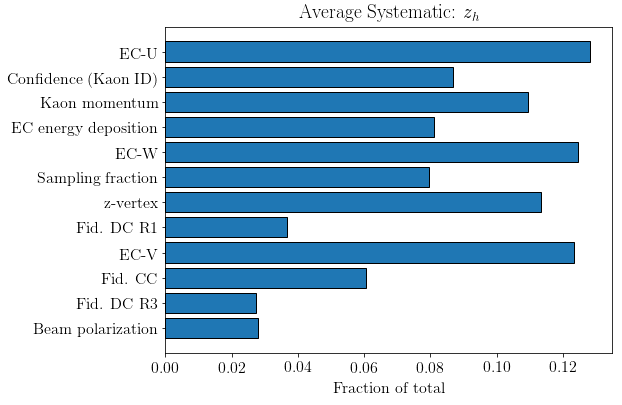

In [11]:
idx = np.where(data['axis'].values == 'z')
errs = [np.mean(np.abs(data.iloc[idx][s].values)) for s in systematics]
errs = np.abs(errs)
errs /= np.sum(errs)
names = [systematic_names[systematic_sources[s]] for s in systematics]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.barh(names, errs, edgecolor='k')
ax.set_xlabel('Fraction of total')
ax.set_title('Average Systematic: $z_h$')
fig.savefig('../image/bar-systematics-z.pdf', bbox_inches='tight')

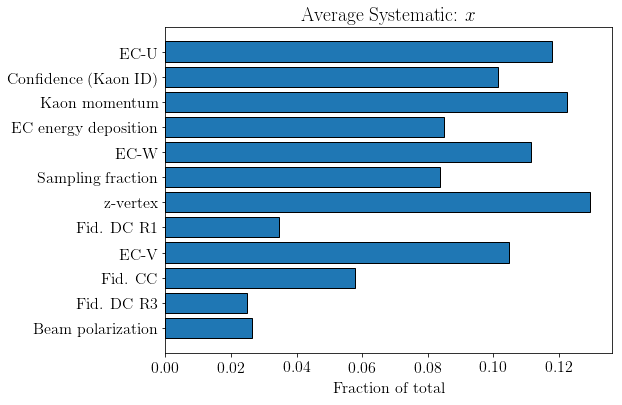

In [12]:
idx = np.where(data['axis'].values == 'x')
errs = [np.mean(np.abs(data.iloc[idx][s].values)) for s in systematics]
errs = np.abs(errs)
errs /= np.sum(errs)
names = [systematic_names[systematic_sources[s]] for s in systematics]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.barh(names, errs, edgecolor='k')
ax.set_xlabel('Fraction of total')
ax.set_title('Average Systematic: $x$')
fig.savefig('../image/bar-systematics-x.pdf', bbox_inches='tight')